<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

This notebook focuses on computing statistics on the dynamics of the model. It will not use the extracted dynamics but the trajectories to determine how different the initial --> final state trajectories are.

In [1]:
from utils import train_model_iteratively, get_model_weights, convert_weight_dict_to_dataframe
# plotting
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [5]:
df = convert_weight_dict_to_dataframe(get_model_weights('./data/tmp_cnn'))

In [7]:
df.head(4)

,model_id,epoch,val_loss,conv_kernel_0_0,conv_kernel_0_1,conv_kernel_0_2,conv_kernel_0_3,conv_kernel_0_4,conv_kernel_0_5,conv_kernel_0_6,...,dense_kernel_0_26,dense_kernel_0_27,dense_kernel_0_28,dense_kernel_0_29,dense_kernel_0_30,dense_kernel_0_31,dense_kernel_0_32,dense_kernel_0_33,dense_kernel_0_34,dense_kernel_0_35
model.9-3-30.14.hdf5,model.9,3,30.14,-1.219838,-1.501132,-1.189210,0.604654,1.626799,0.505742,1.924037,...,1.492884,-1.157016,1.183743,1.850295,-1.505497,-0.444611,-1.346507,-1.398415,1.552887,-1.319386
model.0-3-1767.74.hdf5,model.0,3,1767.74,-0.485245,-1.739551,1.573326,0.255240,1.243825,-1.739016,1.486176,...,0.095183,1.613632,1.013223,-0.849948,1.233348,2.259240,1.206124,-0.599214,0.275901,0.754698
model.4-3-14.55.hdf5,model.4,3,14.55,1.169402,1.718217,-0.892340,-0.356344,-1.883019,-0.743450,-1.276508,...,1.345183,-0.278414,1.725321,-0.828495,-1.583001,0.066530,0.847506,0.382761,-0.044971,-0.084140
model.7-1-939.73.hdf5,model.7,1,939.73,-0.054277,-1.599541,-2.018964,-0.113024,0.765528,-0.080446,-1.770816,...,-0.888143,0.638853,0.693947,1.001279,-0.400025,-1.098023,-0.227793,-0.890912,-1.557634,0.574440


In [12]:
from mg import gp, gp_tensorflow, compute_mse

In [34]:
#Compute Gaussian
cols = [x for x in df.columns if 'kernel' in x]
X1 = df[df['epoch'] == df['epoch'].min()][cols]
Y1 = df[df['epoch'] == df['epoch'].max()][cols]
gp_instance = gp(X1, Y1)

In [36]:
compute_mse(gp_instance.get_model().predict(X1.to_numpy()),Y1.to_numpy())

0.045028154799697684

In [26]:
gp_instance.get_model().predict(X1.to_numpy()).shape

(10, 54)

In [25]:
Y1

,conv_kernel_0_0,conv_kernel_0_1,conv_kernel_0_2,conv_kernel_0_3,conv_kernel_0_4,conv_kernel_0_5,conv_kernel_0_6,conv_kernel_0_7,conv_kernel_0_8,conv_kernel_0_9,...,dense_kernel_0_26,dense_kernel_0_27,dense_kernel_0_28,dense_kernel_0_29,dense_kernel_0_30,dense_kernel_0_31,dense_kernel_0_32,dense_kernel_0_33,dense_kernel_0_34,dense_kernel_0_35
model.9-3-30.14.hdf5,-1.219838,-1.501132,-1.189210,0.604654,1.626799,0.505742,1.924037,-1.103397,-0.896711,-1.615061,...,1.492884,-1.157016,1.183743,1.850295,-1.505497,-0.444611,-1.346507,-1.398415,1.552887,-1.319386
model.0-3-1767.74.hdf5,-0.485245,-1.739551,1.573326,0.255240,1.243825,-1.739016,1.486176,0.419662,0.167095,-0.731036,...,0.095183,1.613632,1.013223,-0.849948,1.233348,2.259240,1.206124,-0.599214,0.275901,0.754698
model.4-3-14.55.hdf5,1.169402,1.718217,-0.892340,-0.356344,-1.883019,-0.743450,-1.276508,-1.828797,-1.590242,-1.493181,...,1.345183,-0.278414,1.725321,-0.828495,-1.583001,0.066530,0.847506,0.382761,-0.044971,-0.084140
model.6-3-87.12.hdf5,0.450024,0.872548,-1.408539,-1.259498,0.429031,1.663073,-0.406537,-1.784788,0.152637,-0.710849,...,-1.388738,-1.414957,0.633345,-1.315580,1.222129,0.255849,-1.608303,2.082723,-0.724218,-0.694775
model.7-3-260.80.hdf5,-0.118719,-1.626108,-2.094617,-0.144793,0.685247,-0.118285,-1.851883,1.273341,0.240662,-0.062797,...,-0.842826,0.593535,0.812636,0.882590,-0.297128,-1.200918,-0.090066,-1.028639,-1.511483,0.528289
model.3-3-68.40.hdf5,-0.002342,1.128560,-1.740025,0.357463,1.697100,-0.914401,-2.077934,0.334038,-0.132933,0.373586,...,-1.216845,-1.373228,-0.597486,1.582971,1.443198,1.749514,0.102425,0.512926,0.631558,1.298551
model.1-3-29.01.hdf5,1.281441,1.186705,-1.163549,-0.462669,-1.764425,1.128807,0.414308,-1.287642,-0.639224,0.768839,...,0.512991,0.362858,-0.434726,0.970172,0.512202,-0.954384,-1.710368,0.558547,-0.870872,-0.278632
model.8-3-94.53.hdf5,-1.624278,-0.798067,1.584641,-1.865320,-0.953686,-0.744706,0.390605,1.662737,0.410672,0.466354,...,-1.728338,-0.706268,-0.440518,0.151099,0.283551,-0.200550,0.642929,1.611335,0.662048,-1.032898
model.5-3-8.21.hdf5,1.811935,-0.877745,-1.450973,1.114067,-0.187733,0.938444,-1.372309,-1.069449,0.836521,-1.221392,...,0.690293,0.362691,-1.468281,-1.586808,-0.626047,1.410361,-0.581315,1.436681,2.351559,0.607951
model.2-3-19.03.hdf5,0.847410,0.397363,-1.274939,0.369281,0.496860,-0.367130,-1.381696,-1.787699,-0.882020,1.222188,...,-0.279891,-1.757425,1.183422,1.697085,1.079323,0.681355,0.319369,-1.048457,1.034762,0.407007


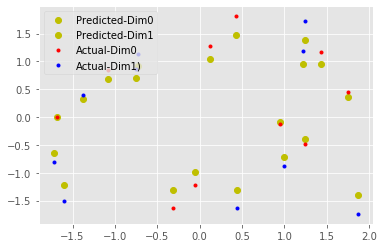

In [42]:

plt.plot(X1.to_numpy()[:,0],gp_instance.get_model().predict(X1.to_numpy())[:,0], 'yo', label='Predicted-Dim0')
plt.plot(X1.to_numpy()[:,1],gp_instance.get_model().predict(X1.to_numpy())[:,1], 'yo', label='Predicted-Dim1');

plt.plot(X1.to_numpy()[:,0], Y1.to_numpy()[:,0], 'r.', label='Actual-Dim0');
plt.plot(X1.to_numpy()[:,1], Y1.to_numpy()[:,1], 'b.', label='Actual-Dim1)');
plt.legend(loc="upper left");

In [37]:
gpt = gp_tensorflow(X1, Y1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [38]:
compute_mse(gpt.get_model().predict_f(X1.to_numpy())[0].numpy(),Y1.to_numpy())

0.30897615825504693

In [39]:
gpt.get_model().predict_f(X1.to_numpy())[0].numpy().shape

(10, 54)

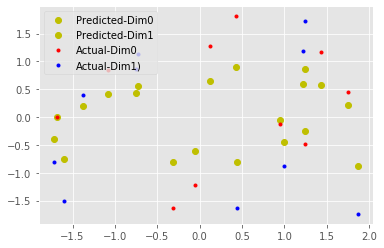

In [43]:
plt.plot(X1.to_numpy()[:,0],gpt.get_model().predict_f(X1.to_numpy())[0].numpy()[:,0], 'yo', label='Predicted-Dim0')
plt.plot(X1.to_numpy()[:,1],gpt.get_model().predict_f(X1.to_numpy())[0].numpy()[:,1], 'yo', label='Predicted-Dim1');

plt.plot(X1.to_numpy()[:,0], Y1.to_numpy()[:,0], 'r.', label='Actual-Dim0');
plt.plot(X1.to_numpy()[:,1], Y1.to_numpy()[:,1], 'b.', label='Actual-Dim1)');
plt.legend(loc="upper left");